In [1]:
# for DataFrames
import numpy as np
import pandas as pd

# for graphing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# for stats + stat testing
import scipy as sp
from scipy import stats 

In [64]:
# read files needed
df_rosenberg = pd.read_csv("../data/01_clean_data/rosenberg_table.csv").drop("Unnamed: 0", axis=1)
df_hof = pd.read_csv("../data/01_clean_data/hofstede_report.csv").drop("Unnamed: 0", axis=1)

### Check out distributions of answers per country of 5 random samples
Useful to find outliers/skewness is answers and overall understanding of distributions.

Necessary to see if we continue working with the sample mean or the median for our correlation analysis. 

In [100]:
sns.set(style="white")

In [ ]:
sns.distplot()

##### Does gender have an influence?

In [170]:
# we select only F, M and O for this, as 0s indicate people who chose not to tell
gender_score = pd.crosstab(df_rosenberg["overall_score"], df_rosenberg["gender"])
gender_score.drop("0", axis=1)
gender_score.head()

# graph all three distibutions
""""F = 
M = 
O = 
"""

'"F = \nM = \nO = \n'

##### Does age have an influence?

In [176]:
# grouping byage + avg gives me a frequency 
rosenberg_grouped_age = df_rosenberg.groupby("age").mean()[["overall_score"]]
#rosenberg_grouped_age = rosenberg_grouped_age.drop("country", axis=1)
rosenberg_grouped_age = rosenberg_grouped_age[10:]

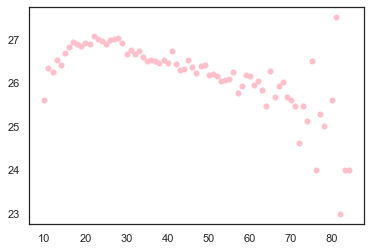

In [177]:
x = rosenberg_grouped_age.index
y = rosenberg_grouped_age["overall_score"]

plt.scatter(x, y, color="pink", linewidth = .05)

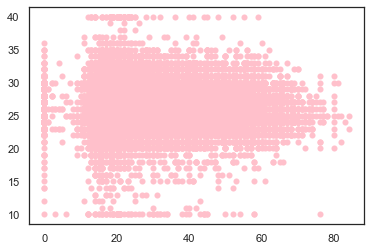

In [178]:
x = df_rosenberg["age"]
y = df_rosenberg["overall_score"]

plt.scatter(x, y, color="pink", linewidth = .05)

### Correlation analysis

In [66]:
# group answers by country and find mean 
rosenberg_grouped = df_rosenberg.groupby("country").mean()
rosenberg_grouped.describe()

,age,overall_score
count,87.000000,87.000000
mean,25.628288,26.909463
std,2.557266,0.479593
min,18.156250,25.468750
25%,24.045928,26.620971
50%,25.637500,26.870056
75%,27.206552,27.192521
max,32.589831,28.421053


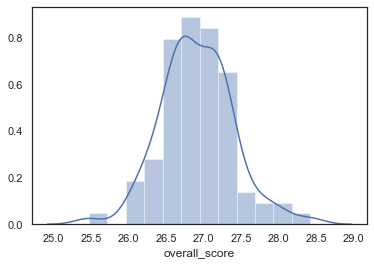

In [128]:
sns.distplot(rosenberg_grouped["overall_score"])

In [96]:
# merging of tables to complete correlation 
merge_df = rosenberg_grouped.merge(df_hof, how="left", on="country")
merge_df = merge_df.dropna()
merge_df.head()

,country,age,overall_score,power_distance,individualism
2,10,23.862069,26.885057,49.0,46.0
3,12,26.565657,27.505051,11.0,55.0
4,13,26.646316,26.718737,36.0,90.0
7,19,25.269231,26.807692,80.0,20.0
8,20,26.098837,26.627907,65.0,75.0


In [185]:
# actual table
correlations = merge_df.corr(method="pearson") 
correlations = correlations.drop(["country", "age"], axis=1)
correlations = correlations.drop(["country", "age"], axis=0)
correlations

,overall_score,power_distance,individualism
overall_score,1.000000,0.232530,-0.183653
power_distance,0.232530,1.000000,-0.570514
individualism,-0.183653,-0.570514,1.000000


In [190]:
# graphic represenation


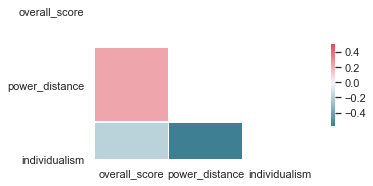

In [188]:
sns.set(style="white")
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Is  the difference significant?
#### H0 and H1 testing